<a href="https://colab.research.google.com/github/AlexMiguel741/CNN-Multiclass-CLassification/blob/main/CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import os
import tensorflow as tf
import numpy as np

SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.getcwd()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = False

# Create training ImageDataGenerator object
if apply_data_augmentation:
    train_data_gen = ImageDataGenerator(rotation_range=10,
                                        width_shift_range=10,
                                        height_shift_range=10,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='constant',
                                        cval=0,
                                        rescale=1./255)
else:
    train_data_gen = ImageDataGenerator(rescale=1./255)

# Create validation and test ImageDataGenerator objects
valid_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Run this cell only if you are using Colab with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Run this cell only if you are using Colab with Drive
!unzip '/content/drive/My Drive/UCMerced_LandUse.zip'

Archive:  /content/drive/My Drive/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/
   creating: UCMerced_LandUse/test/
   creating: UCMerced_LandUse/test/agricultural/
  inflating: UCMerced_LandUse/test/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural20.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural26.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural30.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural33.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural37.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural40.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural41.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural72.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural79.tif  
  inflating: UCMerced_LandUse/test/agricultural/agricultural82.tif  
 

In [ ]:
!ls /content

drive  sample_data  UCMerced_LandUse


In [5]:
# Create generators to read images from dataset directory
# -------------------------------------------------------
dataset_dir = os.path.join(cwd, 'UCMerced_LandUse')

# Batch size
bs = 8

# img shape
img_h = 256
img_w = 256

num_classes=21

decide_class_indices = False
if decide_class_indices:
    classes = ['agricultural',       # 0
               'airplane',           # 1
               'baseballdiamond',    # 2
               'beach',              # 3
               'buildings',          # 4
               'chaparral',          # 5
               'denseresidensial',   # 6
               'forest',             # 7
               'freeway',            # 8
               'golfcourse',         # 9
               'harbor',             # 10
               'intersection',       # 11
               'mediumresidential',  # 12
               'mobilehomepark',     # 13
               'overpass',           # 14
               'parkinglot',         # 15
               'river',              # 16
               'runway',             # 17
               'sparseresidential',  # 18
               'storagetanks',       # 19
               'tenniscourt']        # 20
else:
    classes=None

# Training
training_dir = os.path.join(dataset_dir, 'training')
train_gen = train_data_gen.flow_from_directory(training_dir,
                                               batch_size=bs,
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)  # targets are directly converted into one-hot vectors

# Validation
validation_dir = os.path.join(dataset_dir, 'validation')
valid_gen = valid_data_gen.flow_from_directory(validation_dir,
                                               batch_size=bs, 
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=SEED)

# Test
test_dir = os.path.join(dataset_dir, 'test')
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             batch_size=bs, 
                                             classes=classes,
                                             class_mode='categorical',
                                             shuffle=False,
                                             seed=SEED)

Found 1470 images belonging to 21 classes.
Found 315 images belonging to 21 classes.
Found 315 images belonging to 21 classes.


In [6]:
# Check how keras assigned the labels
train_gen.class_indices

{'agricultural': 0,
 'airplane': 1,
 'baseballdiamond': 2,
 'beach': 3,
 'buildings': 4,
 'chaparral': 5,
 'denseresidential': 6,
 'forest': 7,
 'freeway': 8,
 'golfcourse': 9,
 'harbor': 10,
 'intersection': 11,
 'mediumresidential': 12,
 'mobilehomepark': 13,
 'overpass': 14,
 'parkinglot': 15,
 'river': 16,
 'runway': 17,
 'sparseresidential': 18,
 'storagetanks': 19,
 'tenniscourt': 20}

In [7]:
# Create Dataset objects
# ----------------------

# Training
train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Shuffle (Already done in generator..)
# train_dataset = train_dataset.shuffle(buffer_size=len(train_gen))

# Normalize images (Already done in generator..)
# def normalize_img(x_, y_):
#     return tf.cast(x_, tf.float32) / 255., y_

# train_dataset = train_dataset.map(normalize_img)

# 1-hot encoding <- for categorical cross entropy (Already done in generator..)
# def to_categorical(x_, y_):
#     return x_, tf.one_hot(y_, depth=10)

# train_dataset = train_dataset.map(to_categorical)

# Divide in batches (Already done in generator..)
# train_dataset = train_dataset.batch(bs)

# Repeat
# Without calling the repeat function the dataset 
# will be empty after consuming all the images
train_dataset = train_dataset.repeat()

# Validation
# ----------
valid_dataset = tf.data.Dataset.from_generator(lambda: valid_gen, 
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Repeat
valid_dataset = valid_dataset.repeat()

# Test
# ----
test_dataset = tf.data.Dataset.from_generator(lambda: test_gen,
                                              output_types=(tf.float32, tf.float32),
                                              output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Repeat
test_dataset = valid_dataset.repeat()

In [8]:
# Architecture: Features extraction -> Classifier

start_f = 8
depth = 5

model = tf.keras.Sequential()

# Features extraction
for i in range(depth):

    if i == 0:
        input_shape = [img_h, img_w, 3]
    else:
        input_shape=[None]

    # Conv block: Conv2D -> Activation -> Pooling
    model.add(tf.keras.layers.Conv2D(filters=start_f, 
                                     kernel_size=(3, 3),
                                     strides=(1, 1),
                                     padding='same',
                                     input_shape=input_shape))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

    start_f *= 2
    
# Classifier
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

In [9]:
# Visualize created model as a table
model.summary()

# Visualize initialized weights
model.weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 re_lu_1 (ReLU)              (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                    

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 8) dtype=float32, numpy=
 array([[[[ 1.87292695e-02, -6.66571707e-02,  4.01918888e-02,
           -1.26130164e-01, -3.43003571e-02,  1.99994743e-01,
            3.55525315e-03, -6.95133060e-02],
          [ 1.37295932e-01,  4.19998467e-02,  1.32354498e-01,
           -8.24365020e-03,  4.30276692e-02, -2.35006183e-01,
           -3.16811651e-02,  2.35468864e-01],
          [ 2.36862689e-01, -1.74060702e-01,  2.43510842e-01,
            1.38533324e-01, -1.37798309e-01, -5.41950762e-03,
            6.55457079e-02,  3.13819945e-02]],
 
         [[-4.74313945e-02, -4.98768538e-02,  8.99522901e-02,
            1.34971857e-01, -2.68238485e-02, -2.18192115e-01,
           -1.25084400e-01, -9.58562642e-02],
          [-8.99255723e-02, -1.51148498e-01,  1.60095960e-01,
            4.54548597e-02, -6.18434399e-02,  1.69046938e-01,
           -1.27805948e-01,  1.58601552e-01],
          [-1.66178837e-01, -1.14610642e-01, -4.28984761e-02,
            

In [10]:
# Optimization params
# -------------------

# Loss
loss = tf.keras.losses.CategoricalCrossentropy()

# learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Validation metrics
# ------------------

metrics = ['accuracy']
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [11]:
model.fit(x=train_dataset,
          epochs=50,  #### set repeat in training dataset
          steps_per_epoch=len(train_gen),
          validation_data=valid_dataset,
          validation_steps=len(valid_gen))

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

Epoch 1/50
184/184 [==============================] - 16s 40ms/step - loss: 2.9376 - accuracy: 0.0878 - val_loss: 2.6302 - val_accuracy: 0.2063
Epoch 2/50
184/184 [==============================] - 6s 33ms/step - loss: 2.3633 - accuracy: 0.2741 - val_loss: 2.2679 - val_accuracy: 0.2730
Epoch 3/50
184/184 [==============================] - 6s 34ms/step - loss: 1.9897 - accuracy: 0.3912 - val_loss: 1.8510 - val_accuracy: 0.3905
Epoch 4/50
184/184 [==============================] - 6s 34ms/step - loss: 1.6280 - accuracy: 0.5163 - val_loss: 1.7794 - val_accuracy: 0.4095
Epoch 5/50
184/184 [==============================] - 6s 34ms/step - loss: 1.3429 - accuracy: 0.5980 - val_loss: 1.5802 - val_accuracy: 0.5270
Epoch 6/50
184/184 [==============================] - 6s 34ms/step - loss: 1.0714 - accuracy: 0.6707 - val_loss: 1.3412 - val_accuracy: 0.5524
Epoch 7/50
184/184 [==============================] - 6s 33ms/step - loss: 0.8753 - accuracy: 0.7374 - val_loss: 1.2590 - val_accuracy: 0.584

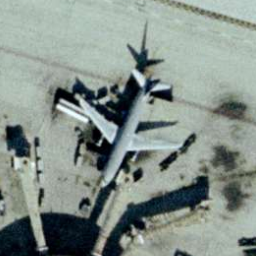

In [15]:
# Let's visualize the activations of our network
from PIL import Image

test_iter = iter(test_dataset)

# Get a test image
test_img = next(test_iter)[0]
test_img = test_img[0]

# Visualize the image
Image.fromarray(np.uint8(np.array(test_img)*255.))

In [16]:
# Print Confusion Matrix and Classification Report (Precision, Recall, and F1-score)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Y_prediction = model.predict_generator(test_gen, len(test_gen))
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = test_gen.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
class_report = classification_report(Y_true, Y_pred_classes, 
                                     target_names=test_gen.class_indices.keys())  # target_names must be ordered depending on the class labels
print('Confusion Matrix:')
print(confusion_mtx)
print()
print('Classification Report:')
print(class_report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  2  0  2  0]
 [ 0  0 12  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  3  0  0  0  0  1  2  0  0  0  0  1  0  1  1]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  7  0  0  0  0  0  2  1  0  1  0  0  0  2  0]
 [ 3  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  9  0  0  1  0  0  0  0  0  0  3  0  1]
 [ 1  0  1  0  0  0  0  0  1 11  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  2  0  1  0  0  0  0  0  2  1]
 [ 0  0  0  0  1  0  0  0  0  0  0 11  0  0  2  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  4  0  0  0  1  0  5  2  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  1  0  2 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  2  0  0  1  0  1  8  1  0  0  0